In [17]:
import numpy as np
## important functions
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

# C2_W1_Lab01_Neurons_and_Layers
In this lab we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models we have mastered in Course 1, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

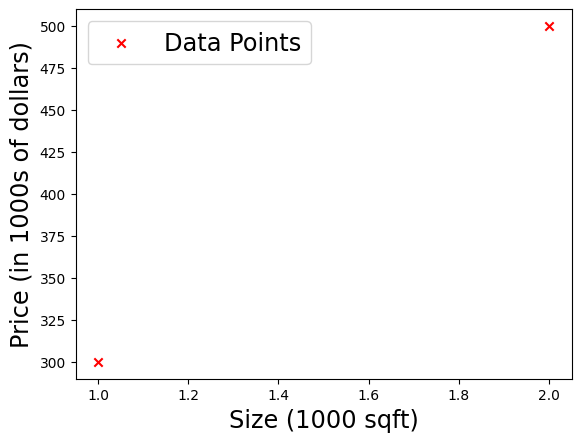

In [4]:
# Data  set
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [6]:
# let's build NN with single layer single node with no activation (i.e simple linear regression model)
linear_layer= Dense(units=1,activation='linear')

In [8]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [9]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1) 

2025-06-12 23:10:56.641812: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


tf.Tensor([[-1.0292335]], shape=(1, 1), dtype=float32)


In [11]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.0292335]], b=[0.]


In [13]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [14]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin) 

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [15]:
linear_layer(X_train)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

Basically they are not building any NN model ,just saying that if you assign same weight bias to NN , that is behaving same as linear regression  model and output they are giving same as the linear regression model which verifies how NN works under the hood.
END of lab 1

# C2_W1_Lab02_CoffeeRoasting_TF
build small NN with Tensorflow

In [19]:
X,Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [20]:
# normalize data 
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [21]:
# Tile/copy our data to increase the training set size and reduce the number of training epochs.
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape) 

(200000, 2) (200000, 1)


In [23]:
# start NN with 2 input nodes , with 2 layers , one with 3 nodes and other one with 1 node (output)
model = Sequential(
    [
        Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# justing confirming the parameters
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [27]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.01695001 -0.0047667  -0.6496467 ]
 [ 0.9936123  -0.5966667   0.27668333]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.86612904]
 [ 0.99915564]
 [-0.61690784]] 
b2(1,): [0.]


In [28]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.2908
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1306
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1185
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0684
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0187
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0118
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0083
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0059
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0043
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0031


#### Epochs and batches
In the `fit` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/10
6250/6250 [==============================] - 6s 910us/step - loss: 0.1782
```
The first line, `Epoch 1/10`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches. The notation on the 2nd line `6250/6250 [====` is describing which batch has been executed.

In [29]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-1.0725119e+01 -1.7357996e+01 -7.7495612e-03]
 [-1.8003026e-01 -1.4520310e+01 -8.5882854e+00]] 
b1: [-11.744104   -2.5586402 -10.646686 ]
W2:
 [[-46.69674 ]
 [ 33.23346 ]
 [-42.043507]] 
b2: [-9.072671]


In [30]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
predictions = 
 [[9.7092944e-01]
 [1.1119779e-04]]


# C2_W1_Lab03_CoffeeRoasting_Numpy

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2025-06-11 23:03:36.577798: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 23:03:36.592918: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 23:03:36.717203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 23:03:36.809915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749663216.905069   74872 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749663216.93

In [5]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


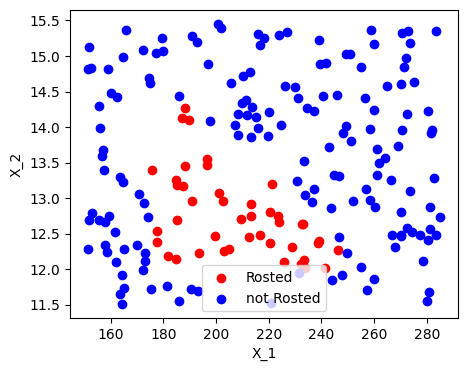

In [35]:
## plot the data
plt.figure(figsize=(5,4))
rosted = Y==1
not_rosted = Y==0
plt.scatter(X[rosted[:,0],0],X[rosted[:,0],1],c='r',marker='o',label='Rosted')
plt.scatter(X[not_rosted[:,0],0],X[not_rosted[:,0],1],c='b',marker='o',label='not Rosted')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend()

In [40]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


2025-06-11 23:03:41.361674: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [41]:
def g(z):
    return 1/(1+ np.exp(-z))

In [ ]:
# Next, you will define the `my_dense()` function which computes the activations of a dense layer.
# here import in W matrix , columns are one single w vector ,for single neuron

In [53]:
def my_dense(a_in, W,b):
    nodes= W.shape[1]
    a_out= np.zeros(nodes)
    for i in range(nodes):
        z= np.dot(W[:,i],a_in)+b[i]
        a_out[i]= g(z)

    return a_out

In [45]:
# lets build 2 layer NN

In [49]:
def my_sequence(x,W1,b1,W2,b2):
     a1= my_dense(x,W1,b1)
     a2= my_dense(a1,W2,b2)
     return a2

In [47]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [48]:
## small information ,from weights size we can predict the NN architectrue
## 2 layers(W1_tem,W2_temp), 3 nodes from first layer, 1 node in second layer
## from rows of W can tell the nodes in previous layer , like W1_temp has two rows ,means 2 inputs are the np.dot competible hona chahiye

In [55]:
# prediction
def my_prediction(X,W1,b1,W2,b2):
    m= X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0]= my_sequence(X[i],W1,b1,W2,b2)
    return p

In [56]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_prediction(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

/tmp/ipykernel_74872/3837749361.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0]= my_sequence(X[i],W1,b1,W2,b2)


In [57]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [61]:
# Done